In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Stats Can and Environment Can Notebook Template</h1>

<h4 align='center'>Laura Gutierrez Funderburk $\mid$ Stats Can Notebook</h4>

<h2 align='center'>Abstract</h2>

In this notebook we download a full dataset and plot multiple one-dimensional subsets of the data. 

Statistics Canada.  Table  17-10-0005-01   Population estimates on July 1st, by age and sex.
 
Data is obtained by product ID 17100005

We implement a friendly user interface based on buttons and dropdown menus that allows the user to explore multiple data sets and subsets of data for a specified date and classification. 


In [2]:
%run -i ./StatsCan/helpers.py
%run -i ./StatsCan/scwds.py
%run -i ./StatsCan/sc.py

In [3]:
from ipywidgets import widgets, VBox, HBox, Button
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown, HTML
import datetime as dt
import pandas as pd
import json
import datetime
import qgrid 
from tqdm import tnrange, tqdm_notebook
from time import sleep

def rerun_cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+3)'))    

    
def run_4cell( b ):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+5)'))    

style = {'description_width': 'initial'}


<h2 align='center'>Downloading Stats Can Data</h2>

To download a full dataset, enter a product ID and press the Download Dataset button. 

In [4]:
prod_ID = widgets.Text(
    value="17100005",
    placeholder='ProductID value',
    description='productID value',
    disabled=False,
    style=style
)


DS_button = widgets.Button(
    button_style='success',
    description="Download Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
DS_button.on_click( rerun_cell )
display(prod_ID)
display(DS_button)

Text(value='17100005', description='productID value', placeholder='ProductID value', style=DescriptionStyle(de…

Button(button_style='success', description='Download Dataset', layout=Layout(height='30px', width='15%'), styl…

In [5]:
# # Download data 
productId = prod_ID.value

download_tables(str(productId))

df_fullDATA = zip_table_to_dataframe(productId)

df_fullDATA_clean = df_fullDATA.drop(columns=["DGUID","UOM_ID","UOM","SCALAR_ID","VECTOR","COORDINATE","STATUS","TERMINATED",\
              "DECIMALS","SYMBOL"])

#df_fullDATA_clean.head()


PARSING DATA AS PANDAS DATAFRAME


<h2 align='center'>Select Data Subsets: One-Dimensional Plotting</h2>


Use the user menu below to select a cateory within the full subset you are interested in exploring. 

Choose a starting and end date to plot results. 

If there is data available, it will appear under the headers. 

Be careful to select dataframes with actual data in them!. 

Use the Select Dataset button to help you preview the data. 

In [6]:
dates = df_fullDATA_clean.iloc[:,0].unique()
geog = df_fullDATA_clean.iloc[:,1].unique()
sex = df_fullDATA_clean.iloc[:,2].unique()
age_group = df_fullDATA_clean.iloc[:,3].unique()
scalar_fact = df_fullDATA_clean.iloc[:,4].unique()



geo_dp = widgets.Dropdown(
    options = geog, 
    description ='Select location:', 
    style = style, 
    disabled=False
)

age_group_gp = widgets.Dropdown(
    options = age_group, 
    description ='Select age group:', 
    style = style, 
    disabled=False
)

sex_gp = widgets.Dropdown(
    options = sex, 
    description ='Select gender identity:', 
    style = style, 
    disabled=False
)

sdates_dp = widgets.Dropdown(
    value = dates[0],
    options = dates, 
    description ='Select starting date:', 
    style = style, 
    disabled=False
)

edates_dp = widgets.Dropdown(
    value = dates[-1],
    options = dates, 
    description ='Select end date:', 
    style = style, 
    disabled=False
)

CD_button = widgets.Button(
    button_style='success',
    description="Preview Dataset", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button.on_click( run_4cell )


tab3 = VBox(children=[HBox(children=[geo_dp]),
                      HBox(children=[sdates_dp,edates_dp]),
                      HBox(children=[sex_gp,age_group_gp]),
                      HBox(children=[]),CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Load Data Subset')
display(tab)

<IPython.core.display.Javascript object>

In [32]:
sdate = sdates_dp.value
edate = edates_dp.value
esex = sex_gp.value
eage = age_group_gp.value
geoLoc = geo_dp.value


In [33]:
df_subdata_time = df_fullDATA_clean[(df_fullDATA_clean['REF_DATE'] >= sdate) & (df_fullDATA_clean['REF_DATE'] <= edate)]
df_subdata_time_sex = df_subdata_time[df_subdata_time["Sex"]==esex]
df_subdata_time_sex_age = df_subdata_time_sex[df_subdata_time_sex["Age group"]==eage]
df_subdata_time_sex_age_geo = df_subdata_time_sex_age[df_subdata_time_sex_age["GEO"]==geoLoc]
df_subdata_time_sex_age_geo.head()

,REF_DATE,GEO,Sex,Age group,SCALAR_FACTOR,VALUE
1500,1971-01-01,New Brunswick,Both sexes,All ages,units,642471.0
6375,1972-01-01,New Brunswick,Both sexes,All ages,units,648769.0
11250,1973-01-01,New Brunswick,Both sexes,All ages,units,656720.0
16125,1974-01-01,New Brunswick,Both sexes,All ages,units,664744.0
21000,1975-01-01,New Brunswick,Both sexes,All ages,units,677008.0


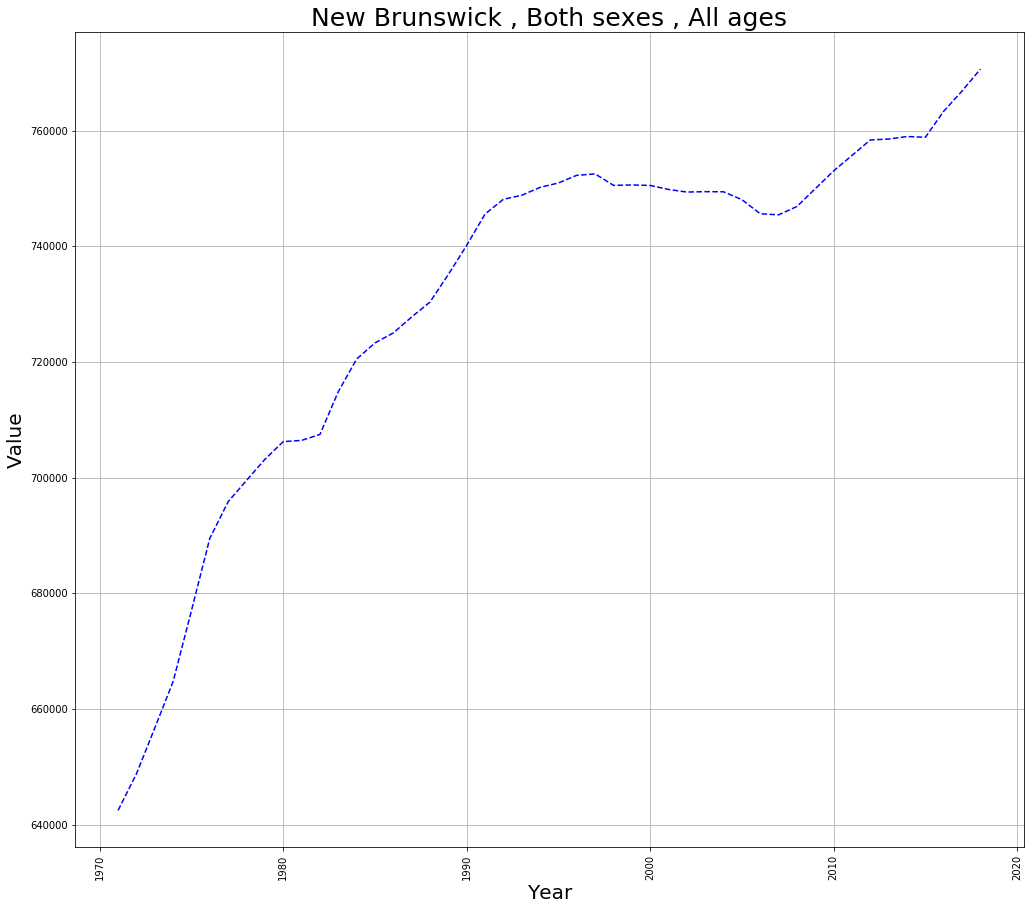

In [34]:

import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(facecolor='w',figsize=(17,15))
# plt.subplot(2, 2, 1)
# weather_data['Temp (°C)'] = weather_data['Temp (°C)'].interpolate()
# sns.set_style('whitegrid')

# if geoLoc=="Yukon":
    
#     weather_data = all_the_weather_data_YUKON[0]
#     title = "White Horse"
# elif geoLoc=="Northwest Territories":
#     weather_data = all_the_weather_data_YUKON[1]
#     title = "Yellowknife"
# elif geoLoc=="Nunavut":
#     weather_data = all_the_weather_data_YUKON[2]
#     title = "Rankin Inlet"

# plt.plot(weather_data['Date/Time'], weather_data['Temp (°C)'])
# plt.plot(weather_data['Date/Time'], weather_data['Temp (°C)'].rolling(window=250,center=False).mean(), '-k', alpha=1.0)
# plt.title("Temperature in " + title ,fontsize=25)
# plt.ylabel('Temp (°C)')
# plt.xlabel('Time')


#plt.subplot(2, 2, 2)
plt.plot(df_subdata_time_sex_age_geo["REF_DATE"],df_subdata_time_sex_age_geo["VALUE"],'b--',label='Value')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Value',fontsize=20)
plt.title(geoLoc + " , " + esex + " , " + eage ,fontsize=25)
plt.xticks(rotation=90)
plt.grid(True)


<h2 align='center'>Select Data Subsets: Plotting Charts</h2>



In [10]:
def get_year_pd(dataframe,syear):
    df_year = dataframe.loc[(dataframe['REF_DATE'] == syear)]
    df4 = df_year.rename(index=str, columns={"VALUE": syear.split("-")[0],"GEO":"Geography"})
    df4 = df4.drop(columns="REF_DATE")

    return df4

def get_rate_gi_loc(year_df,gender_id,age_group,location):
    
    df_s = year_df[(year_df["Sex"]==gender_id) ]
    
    df_s_ag =  df_s[(df_s["Age group"]==age_group)]
    
    df_s_ag_loc = df_s_ag[(df_s_ag["Geography"]==location)]
    
    df = df_s_ag_loc
    
    return df

In [11]:
def get_all_years(df,gender_id,age_group,location,startYear,endYear):
    all_dfs_yukon = []
    for i in range(startYear,endYear):
        df_test = get_year_pd(df,str(i)+"-01-01	")
        df_specific  = get_rate_gi_loc(df_test,gender_id,age_group,location)
        all_dfs_yukon.append(df_specific)

    dfs = [all_dfs_yukon[i] for i in range(len(all_dfs_yukon))]
    cols = ['Geography', 'Sex','Age group','SCALAR_FACTOR']
    keys = [str(2004 + i) for i in range(len(all_dfs_yukon))]
    concat_df = pd.concat(
        [df.set_index(cols) for df in dfs],
        axis=1)

    return concat_df

In [12]:
geo_dp2 = widgets.Dropdown(
    options = geog, 
    description ='Select location:', 
    style = style, 
    disabled=False
)

options = ["Pie Chart","Bar Chart"]

option = widgets.Dropdown(
    options = options, 
    description ='Select location:', 
    style = style, 
    disabled=False
)

CD_button2 = widgets.Button(
    button_style='success',
    description="Preview Chart", 
    layout=Layout(width='15%', height='30px'),
    style=style
)    
CD_button2.on_click( rerun_cell )


tab3 = VBox(children=[HBox(children=[geo_dp2,option]),
                      HBox(children=[]),CD_button])
tab = widgets.Tab(children=[tab3])
tab.set_title(0, 'Preview Chart')
display(tab)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
opt = option.value
whichprovince = geo_dp2.value

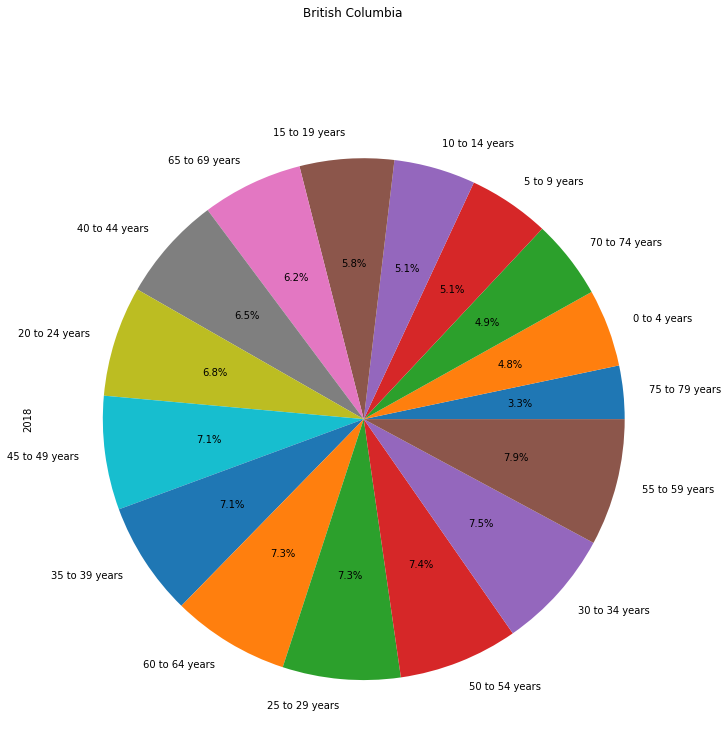

In [59]:
age_range = pd.concat([get_all_years(df_fullDATA_clean,"Both sexes",item,whichprovince ,2008,2019)\
                      for item in ["0 to 4 years","5 to 9 years","10 to 14 years","15 to 19 years",\
                                  "20 to 24 years","25 to 29 years","30 to 34 years","35 to 39 years",
                                  "40 to 44 years","45 to 49 years","50 to 54 years","55 to 59 years",
                                  "60 to 64 years","65 to 69 years","70 to 74 years","75 to 79 years"]])

if opt=="Pie Chart":
    pd.pivot_table(age_range,index=["Age group"], 

               values = ["2018"]).sort_values(by=['2018'], 
                ascending=[True]).plot(
                kind='pie', subplots=True, title= whichprovince, legend=False, figsize=(12,12), autopct='%1.1f%%');

elif opt=="Bar Chart":
    pd.pivot_table(age_range,index=["Age group"], 
               values = [str(2008 + i) for i in range(11)]).sort_values(by=['2008'], 
                ascending=[False]).plot(kind='bar', figsize=(10,6));

In [15]:
# a = []
# for it in geog:
#     for item in ["0 to 4 years","5 to 9 years","10 to 14 years","15 to 19 years",\
#                                   "20 to 24 years","25 to 29 years","30 to 34 years","35 to 39 years",
#                                   "40 to 44 years","45 to 49 years","50 to 54 years","55 to 59 years",
#                                   "60 to 64 years","65 to 69 years","70 to 74 years","75 to 79 years"]:
#         a.append(get_all_years(df_fullDATA_clean,"Both sexes",item,it ,2008,2019))
        
# all_the_entries = pd.concat(a)

In [16]:
# geog2 = [item for item in geog if item!="Canada"]
# all_ages = pd.concat([get_all_years(df_fullDATA_clean,"Both sexes","All ages",item,2008,2019) for item in geog2])

# pd.pivot_table(all_ages,index=["Geography"], 
#                aggfunc = 'mean', 
#                values = [str(2008 + i) for i in range(11)]).sort_values(by=['2008'], 
#                 ascending=[True]).plot(kind='bar', figsize=(10,6));

<h2 align='center'>References</h2>

Statistics Canada.  Table  17-10-0005-01   Population estimates on July 1st, by age and sex
 https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000501


# ![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)